# 🧠 Gradient Descent — Foundations and Visualization

This notebook introduces **Gradient Descent (GD)** — the cornerstone of optimization in machine learning.  

---

## 📘 Objectives

- Understand the **mathematical formulation** of gradient descent.  
- Visualize its **iterative path** over a 2D loss surface.  
- Comprehend how **learning rate** influences convergence.  
- Connect gradient descent to **differential geometry** and **optimization theory**.  

---

### 🧭 References

1. Goodfellow, Bengio, Courville (2016). *Deep Learning*, MIT Press — Chapter 8: Optimization for Training Deep Models.  
2. Boyd, S., & Vandenberghe, L. (2004). *Convex Optimization*.  
3. Bottou, L., Curtis, F., & Nocedal, J. (2018). *Optimization Methods for Large-Scale Machine Learning*. *SIAM Review*, 60(2), 223–311.  
4. Nesterov, Y. (2004). *Introductory Lectures on Convex Optimization*.  

---

## 🌄 Intuition: Descending the Loss Landscape

Imagine standing on a mountain in thick fog.  
You can’t see far, but you can feel the **slope** beneath your feet — the direction of **steepest descent**.  
If you take small steps *opposite* to that slope, you’ll gradually reach the valley bottom.  

That’s the essence of **Gradient Descent**.  

---

### 🧮 Mathematical Formulation

Given an objective function $ L$theta) $, we update parameters iteratively:

$$
\theta_{t+1} = \theta_t - \eta \nabla_\theta L$theta_t)
$$

where:  
- $\theta_t $: parameters at iteration *t*  
- $\eta $: learning rate (step size)  
- $\nabla_\theta L$theta_t) $: gradient of the loss at *t*

---

### ⚙️ Algorithm Steps

1. Initialize parameters $ \theta_0 $
2. Compute the gradient $ g_t = \nabla_\theta L$theta_t) $
3. Update: $ \theta_{t+1} = \theta_t - \eta g_t $
4. Repeat until convergence

---

### 🧠 Geometric Interpretation

- The gradient points in the **direction of steepest ascent**.  
- The negative gradient points to **steepest descent**.  
- The learning rate $ \eta $ controls **step size** — too small and convergence is slow, too large and it diverges.

---

### Step-1: Imports and Environment Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import display, Markdown

### Step-2: Define the Sample Function and its Gradient

In [2]:
# Define a simple convex function: f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

# Its gradient
def grad_f(x, y):
    return np.array([2*x, 2*y])

### Step-3: Visualise the Loss Surface

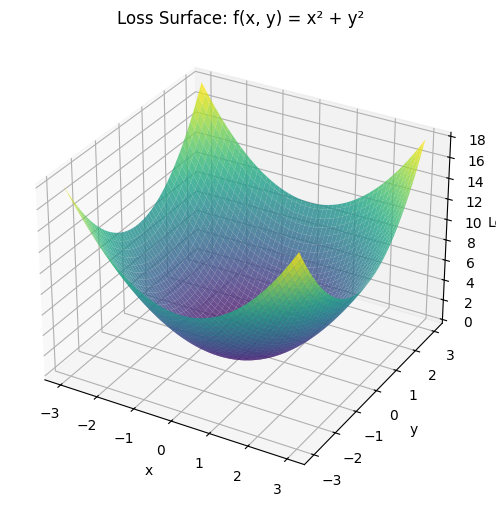

In [4]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8)
ax.set_title("Loss Surface: f(x, y) = x² + y²")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Loss")
plt.show()

### Step-4: Implement Gradient Decsent

In [5]:
def gradient_descent(grad, start, lr=0.1, n_iter=25):
    x_history = [start]
    x = start
    for _ in range(n_iter):
        g = grad(*x)
        x = x - lr * g
        x_history.append(x)
    return np.array(x_history)

# Run gradient descent
path = gradient_descent(grad_f, start=np.array([2.5, 2.5]), lr=0.1)

### Step-5: VIsualise the Optimization Path

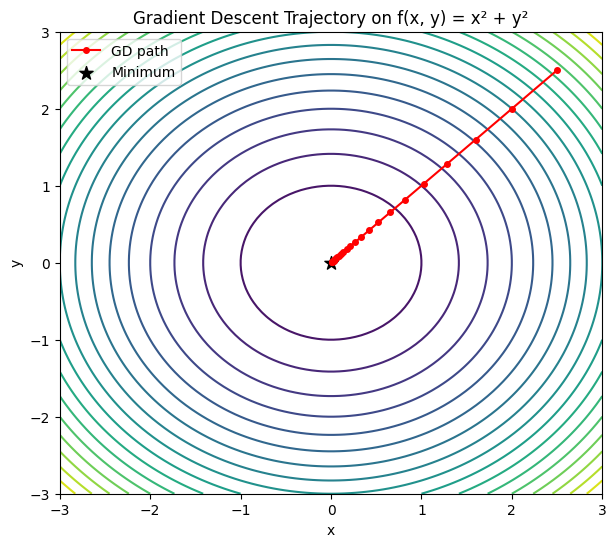

In [6]:
plt.figure(figsize=(7,6))
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.plot(path[:,0], path[:,1], 'ro-', markersize=4, label='GD path')
plt.scatter(0, 0, c='black', marker='*', s=100, label='Minimum')
plt.title("Gradient Descent Trajectory on f(x, y) = x² + y²")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## 🎛️ Interactive Exploration: Learning Rate Effects

Try modifying the learning rate `lr` below and re-running the code cell to observe:

| Learning Rate | Behavior |
|----------------|-----------|
| 0.01 | Converges slowly |
| 0.1 | Converges smoothly |
| 0.5 | Oscillates but converges |
| >1.0 | Diverges |

You can change the value of `lr` in the code cell below and re-run it to **see how the optimizer behaves**.

### Comparison of Learning Rate

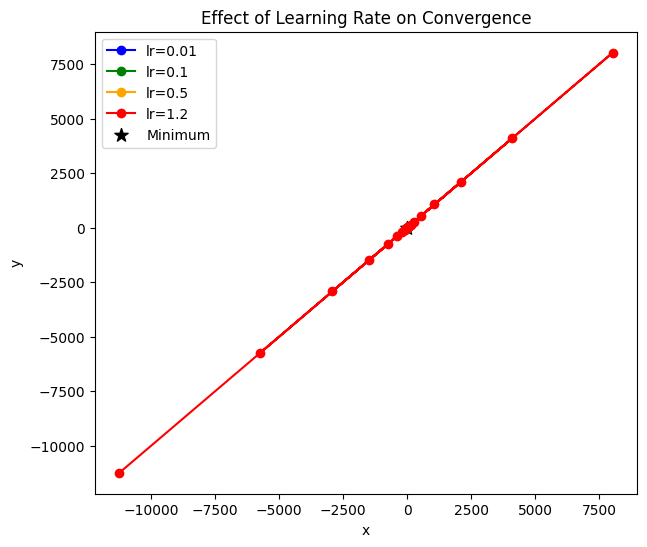

In [7]:
learning_rates = [0.01, 0.1, 0.5, 1.2]
colors = ['b', 'g', 'orange', 'r']

plt.figure(figsize=(7,6))
plt.contour(X, Y, Z, levels=20, cmap='viridis')

for lr, c in zip(learning_rates, colors):
    path = gradient_descent(grad_f, start=np.array([2.5, 2.5]), lr=lr)
    plt.plot(path[:,0], path[:,1], 'o-', color=c, label=f'lr={lr}')

plt.scatter(0, 0, c='black', marker='*', s=100, label='Minimum')
plt.title("Effect of Learning Rate on Convergence")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## 📉 Convergence Analysis

For convex quadratic functions like $ f(x, y) = x^2 + y^2 $, Gradient Descent converges **linearly** to the global minimum if:

$$
0 < \eta < \frac{2}{L}
$$

where $ L $ is the **Lipschitz constant** of the gradient (i.e., the largest eigenvalue of the Hessian).

---

For our function:
$
\nabla^2 f(x, y) =
\begin{bmatrix}
2 & 0 \\
0 & 2
\end{bmatrix}
\Rightarrow L = 2
$

So we require:
$
0 < \eta < 1
$

This aligns with our visual observations:
- $ \eta = 0.1 $ → smooth convergence  
- $ \eta = 0.5 $ → oscillation  
- $ \eta > 1.0 $ → divergence  

---

### 🧩 Connection to Optimization Theory

- Gradient descent is a **first-order method** (uses only first derivatives).  
- It performs **steepest descent** in the **Euclidean metric**.  
- Other optimizers (like Natural Gradient) perform steepest descent under **non-Euclidean metrics** (e.g., Fisher Information Metric).

---


# ✅ Summary

In this notebook, we:
- Defined the **mathematics of Gradient Descent**
- Understood its **geometric intuition**
- Visualized convergence over a simple surface
- Explored **learning rate effects**

---

### 🔮 Next Steps

In the next notebook, we’ll extend this foundation to:
- **Momentum** and **Nesterov Accelerated Gradient**
- Understand how **inertia** modifies the optimization dynamics

---

> “Gradient descent is not just an algorithm — it’s a philosophy of learning by correction.”  
> — *Anonymous*
